# CNN Model with Custom Animals Dataset

In [43]:
# Used Website(s):
# https://www.pyimagesearch.com/2018/04/09/how-to-quickly-build-a-deep-learning-image-dataset/ (for acquiring data)
#

In [44]:
from PIL import Image
import os
import numpy as np
import random
import pickle
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import model_from_json
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [21]:
class Dataset:

    def __init__(self, path, dim):
        '''
        This method is the initialization function for a Dataset object.

        Parameters:
        -----------
        self: The Dataset object.
        self.path (str): The relative path of the dataset.\n
        self.labels (list): The labels of the images.\n
        self.dimension (tuple): The desired dimensions of the images.
        '''

        self._path = path
        self._labels = []
        self._dim = dim
        self._training_data = []
        
        self.create_labels()
        self.create_train_data()

    def create_labels(self):
        
        for label_name in os.listdir(self._path):
            if label_name != ".DS_Store":
                if os.path.isdir(os.path.join(self._path)):
                    self._labels.append(label_name)
        
    def create_train_data(self):
        '''
        This method creates the training data.

        Parameters:
        -----------
        self: The Dataset object.
        '''

        for i,label in enumerate(self._labels):

            class_path = self._path + label + "/"

            for image in os.listdir(class_path):
                if image != ".DS_Store":
                    img = Image.open(class_path + image).convert('RGB').resize(self._dim)
                    self._training_data.append([np.asarray(img), i])
        
    def get_path(self):
        return self._path
    
    def get_dim(self):
        return self._dim
    
    def get_labels(self):
        return self._labels
    
    def get_training_data(self):
        return self._training_data

In [22]:
# Instantiate animals dataset
animals = Dataset("Datasets/animals/", (96,96))

/Users/rumaisaabdulhai/anaconda3/envs/python36/lib/python3.6/site-packages/PIL/Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [23]:
training_data = animals.get_training_data()

random.shuffle(training_data)

X_train = [] 
y_train = [] 

for features, label in training_data:
    X_train.append(features)
    y_train.append(label)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

pickle_out = open("X_train.pickle", "wb")
pickle.dump(X_train, pickle_out)
pickle_out.close()

pickle_out = open("y_train.pickle", "wb")
pickle.dump(y_train, pickle_out)
pickle_out.close()

In [24]:
# Open files
X_train = pickle.load(open("X_train.pickle", "rb"))
y_train = pickle.load(open("y_train.pickle", "rb"))

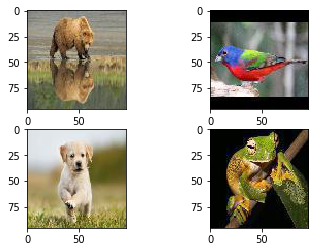

In [25]:
# Plot first four images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))

# show the plot
plt.show()

In [26]:
# For reproducibility
seed = 7
np.random.seed(seed)

In [27]:
# Normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0

In [28]:
# Dimensions of training and testing data
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of y_train: {}".format(y_train.shape))

Shape of X_train: (1980, 96, 96, 3)
Shape of y_train: (1980,)


In [29]:
# Splitting Training and Testing Data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.15, random_state=42)

In [30]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [31]:
# View one hot encoded array
y_train[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
# Dimensions of training and testing data
print("Shape of X_train: {}".format(X_train.shape))
print("Shape of X_test: {}".format(X_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))
print('\n')
print('data type: {}'.format(X_train.dtype))
print('label type: {}'.format(y_train.dtype))

Shape of X_train: (1683, 96, 96, 3)
Shape of X_test: (297, 96, 96, 3)
Shape of y_train: (1683, 10)
Shape of y_test: (297, 10)


data type: float64
label type: float32


In [14]:
# 3 Convolutional Layers
# 1 Max Pooling Layer
# 1 Dropout Layer
# 1 Hidden Layer

def model():
    model = Sequential()
    model.add(Conv2D(48, (5, 5), activation='relu', input_shape=(96,96,3)))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(Conv2D(48, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), data_format='channels_last'))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [15]:
# build the model
model = model()

# Fit the model
hist = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)

Train on 1514 samples, validate on 169 samples
Epoch 1/10
1514/1514 [==============================] - 66s 43ms/sample - loss: 2.3208 - accuracy: 0.1229 - val_loss: 2.2595 - val_accuracy: 0.1243
Epoch 2/10
1514/1514 [==============================] - 67s 44ms/sample - loss: 2.1722 - accuracy: 0.2411 - val_loss: 2.1729 - val_accuracy: 0.2840
Epoch 3/10
1514/1514 [==============================] - 72s 48ms/sample - loss: 1.7692 - accuracy: 0.4247 - val_loss: 1.9353 - val_accuracy: 0.3787
Epoch 4/10
1514/1514 [==============================] - 68s 45ms/sample - loss: 1.1344 - accuracy: 0.6189 - val_loss: 2.0754 - val_accuracy: 0.3136
Epoch 5/10
1514/1514 [==============================] - 65s 43ms/sample - loss: 0.5667 - accuracy: 0.8223 - val_loss: 3.0957 - val_accuracy: 0.3846
Epoch 6/10
1514/1514 [==============================] - 66s 44ms/sample - loss: 0.2261 - accuracy: 0.9353 - val_loss: 3.3281 - val_accuracy: 0.3728
Epoch 7/10
1514/1514 [==============================] - 63s 42ms/

NameError: name 'scores' is not defined

In [18]:
# Final evaluation of the model
results = model.evaluate(X_test, y_test, batch_size=128)
print("CNN Error: %.2f%%" % (100-results[1]*100))

297/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

CNN Error: 57.58%


Saved model to disk.
INFO:tensorflow:Assets written to: CNN.model/assets
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


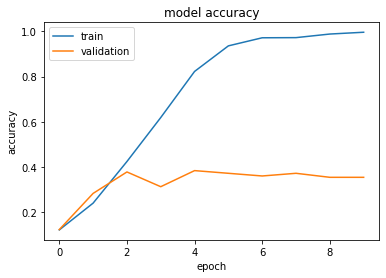

In [35]:
# Saving the model
model_json = model.to_json()
with open("model.json", "w") as json_file :
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk.")

model.save('CNN.model')

# Printing a graph showing the accuracy changes during the training phase
print(hist.history.keys())
plt.figure(1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')

In [42]:
model = tf.keras.models.load_model("CNN.model")
prediction = model.predict([X_test[0:,]])
prediction = list(prediction[0])
print(prediction)
print(animals.get_labels()[prediction.index(max(prediction))])

[0.0006949736, 4.720511e-08, 0.00030863393, 0.00052715687, 2.6256546e-06, 2.5784095e-05, 6.326506e-05, 4.5256944e-05, 0.00036035816, 0.99797195]
deer
